### Corporate Governance Compliance Study
###  Exploratory Factor Analysis (EFA) to identify barriers and drivers of corporate governance compliance.


In [6]:
import pandas as pd

# Load the datasets
df_raw = pd.read_excel("raw_ds.xlsx")
df_categorical = pd.read_excel("categorical_data.xlsx")
df_questions = pd.read_excel("survey_questions.xlsx")

# Display basic info for each dataset
print("Raw Dataset Info:")
print(df_raw.info())
#print(df_raw.head())

print("\nCategorical Data Info:")
print(df_categorical.info())
#print(df_categorical.head())

print("\nSurvey Questions Info:")
print(df_questions.info())
#print(df_questions.head())

Raw Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 96 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sr #            105 non-null    int64  
 1   Age             105 non-null    int64  
 2   Position        105 non-null    int64  
 3   Qual            105 non-null    int64  
 4   Specialisation  105 non-null    int64  
 5   Exp             105 non-null    int64  
 6   A1              105 non-null    int64  
 7   A2              105 non-null    int64  
 8   A3              105 non-null    int64  
 9   A4              105 non-null    int64  
 10  A5              105 non-null    int64  
 11  A6              105 non-null    int64  
 12  A7              105 non-null    int64  
 13  B1              105 non-null    int64  
 14  B2              105 non-null    int64  
 15  B3              105 non-null    int64  
 16  B4              105 non-null    int64  
 17  B5              1

In [8]:
# Check missing values
print("\nMissing Values in Raw Dataset:")
print(df_raw.isnull().sum())

print("\nMissing Values in Categorical Data:")
print(df_categorical.isnull().sum())

print("\nMissing Values in Survey Questions:")
print(df_questions.isnull().sum())

# Fill missing values (numerical columns) with mean
df_raw.fillna(df_raw.mean(), inplace=True)
df_categorical.fillna("Unknown", inplace=True)  # Categorical values replaced with 'Unknown'
df_questions.fillna("Not Available", inplace=True)  # For missing question text

# Drop rows with excessive missing values (optional)
df_raw.dropna(thresh=len(df_raw.columns) * 0.7, inplace=True)  # Keeps rows with at least 70% data


Missing Values in Raw Dataset:
Sr #              0
Age               0
Position          0
Qual              0
Specialisation    0
                 ..
%age              0
ROA               0
RoE               0
ROA.1             0
RoE.1             0
Length: 96, dtype: int64

Missing Values in Categorical Data:
Category       0
Code           0
Description    0
dtype: int64

Missing Values in Survey Questions:
Question_Id             0
Question_description    0
Category                0
dtype: int64


## standardise the format

In [10]:
# Standardize column names
df_raw.columns = df_raw.columns.str.lower().str.strip().str.replace(" ", "_")
df_categorical.columns = df_categorical.columns.str.lower().str.strip().str.replace(" ", "_")
df_questions.columns = df_questions.columns.str.lower().str.strip().str.replace(" ", "_")

# Convert categorical data to lowercase
df_categorical = df_categorical.apply(lambda x: x.astype(str).str.lower().str.strip())
df_questions = df_questions.apply(lambda x: x.astype(str).str.lower().str.strip())

### describe 

In [12]:
import pandas as pd

# Define feature columns
feature_columns = ["age", "position", "qual", "specialisation", "exp"] + \
                  [f"ba{i}" for i in range(1, 18)] + \
                  [f"dr{i}" for i in range(1, 13)]


# Filter dataset for only selected feature columns
df_features = df_raw[feature_columns]

# Generate descriptive statistics
df_describe = df_features.describe()

print(df_describe)

              age    position        qual  specialisation         exp  \
count  105.000000  105.000000  105.000000      105.000000  105.000000   
mean     2.552381    1.990476    2.457143        2.266667    2.247619   
std      0.980394    0.914575    0.877371        1.030932    0.756776   
min      1.000000    1.000000    1.000000        1.000000    1.000000   
25%      2.000000    1.000000    2.000000        1.000000    2.000000   
50%      2.000000    2.000000    2.000000        2.000000    2.000000   
75%      3.000000    2.000000    3.000000        3.000000    3.000000   
max      5.000000    4.000000    5.000000        5.000000    4.000000   

              ba1        ba2         ba3         ba4         ba5  ...  \
count  105.000000  105.00000  105.000000  105.000000  105.000000  ...   
mean     3.580952    3.67619    3.771429    3.838095    3.704762  ...   
std      1.246387    1.34089    1.154066    1.101780    1.176074  ...   
min      1.000000    1.00000    2.000000    2.0000

## map categorical values

In [113]:


# Define mapping dictionaries based on the reference table
age_mapping = {1: "30 years or less", 2: "31 to 40 years", 3: "41 to 50 years", 4: "51 to 60 years", 5: "Above 60 years"}
position_mapping = {1: "Senior Manager", 2: "Manager", 3: "Accountant", 4: "Auditor", 5: "Other"}
qualification_mapping = {1: "PhD or Equivalent", 2: "Masters or equivalent", 3: "Bachelors or equivalent", 
                         4: "Diploma or professional", 5: "Others"}
specialization_mapping = {1: "Finance", 2: "Accounting", 3: "Economics", 4: "Management", 5: "Others"}
experience_mapping = {1: "5 years or less", 2: "6 to 10 years", 3: "11 to 15 years", 4: "16 to 20 years", 5: "Above 20 years"}

# Apply mappings to the raw dataset
df_raw["age_group"] = df_raw["age"].map(age_mapping)
df_raw["position_category"] = df_raw["position"].map(position_mapping)
df_raw["qual_category"] = df_raw["qual"].map(qualification_mapping)
df_raw["specialisation_category"] = df_raw["specialisation"].map(specialization_mapping)
df_raw["experience_group"] = df_raw["exp"].map(experience_mapping)

print("Categorical variables mapped successfully!")

df_raw.to_excel("mapped_dataset.xlsx", index=False)
print("Mapped dataset saved successfully!")

Categorical variables mapped successfully!
Mapped dataset saved successfully!


In [99]:
print(df_raw.head())

   sr_#  age  position  qual  specialisation  exp  a1  a2  a3  a4  ...  \
0     1    2         2     2               3    2   4   4   3   4  ...   
1     2    3         4     3               1    3   2   1   3   4  ...   
2     3    1         3     2               4    1   1   3   2   3  ...   
3     4    4         3     3               2    3   3   3   2   3  ...   
4     5    2         2     2               2    1   4   4   5   5  ...   

       %age       roa       roe     roa.1     roe.1         age_group  \
0  0.795833  0.180568  0.204166  0.180568  0.204166    31 to 40 years   
1  0.654167  0.058317  0.097522  0.062861  0.151215    41 to 50 years   
2  0.600000  0.017459  0.056479  0.017372  0.041706  30 years or less   
3  0.616667  0.012970  0.021293  0.012970  0.021293    51 to 60 years   
4  0.837500 -0.000110 -0.000150 -0.011748 -0.015382    31 to 40 years   

   position_category            qual_category  specialisation_category  \
0            Manager    Masters or equival

### clone feature variables before scaling

In [14]:
### using mapped_raw dataset going forward #####

import pandas as pd

# Load dataset

# Define feature columns
feature_columns = ["age", "position", "qual", "specialisation", "exp"] + \
                  [f"ba{i}" for i in range(1, 18)] + \
                  [f"dr{i}" for i in range(1, 13)]

# Clone columns within the same dataset
for col in feature_columns:
    if col in df_raw.columns:  # Ensure column exists before cloning
        df_raw[col + "_original"] = df_raw[col]

print("Feature columns cloned successfully!")

Feature columns cloned successfully!


### Feature selection

In [16]:
print(df_raw.columns)  # List all available columns

Index(['sr_#', 'age', 'position', 'qual', 'specialisation', 'exp', 'a1', 'a2',
       'a3', 'a4',
       ...
       'dr3_original', 'dr4_original', 'dr5_original', 'dr6_original',
       'dr7_original', 'dr8_original', 'dr9_original', 'dr10_original',
       'dr11_original', 'dr12_original'],
      dtype='object', length=130)


In [18]:
[target for target in df_raw.columns if "cgi" in target.lower()]

['total_cgi']

In [20]:
# Define the target variable (CGI Score)
y = df_raw["total_cgi"]

# Define feature variables
feature_columns = ["age", "position", "qualification", "specialisation", "experience"] + \
                  [f"ba{i}" for i in range(1, 18)] + \
                  [f"dr{i}" for i in range(1, 13)]

# Ensure columns exist before selection
feature_columns = [col for col in feature_columns if col in df_raw.columns]

# Select features for modeling
X = df_raw[feature_columns]

In [22]:
for col in ["age", "position", "qual", "specialisation", "exp"]:
    if col in df_raw.columns:
        encoder = LabelEncoder()
        df_raw.loc[:, col] = encoder.fit_transform(df_raw[col])

# Then, select X as usual
X = df_raw[feature_columns]

NameError: name 'LabelEncoder' is not defined

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature Selection Setup Complete!")

Feature Selection Setup Complete!


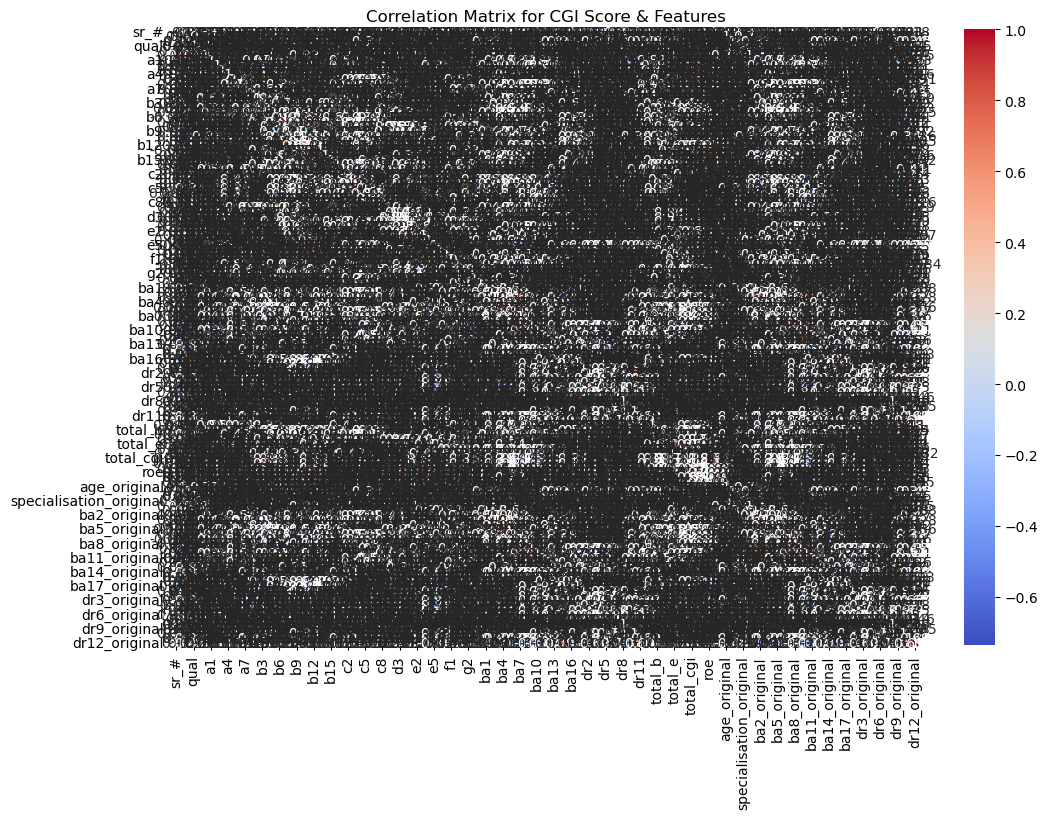

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_raw.corr()

# Visualize with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Correlation Matrix for CGI Score & Features")
plt.show()

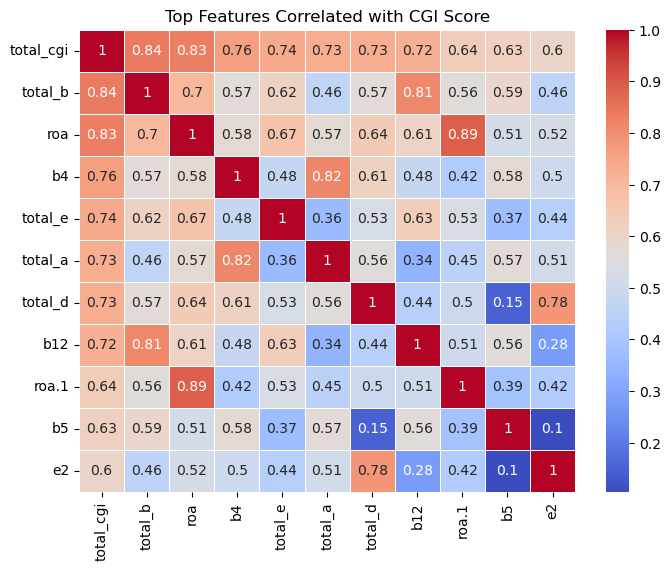

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation values for total_cgi
correlations = df_raw.corr()["total_cgi"].sort_values(ascending=False)

# Filter top positively and negatively correlated features
top_features = correlations[1:12]  # Select top 10 highest correlations

# Plot refined correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_raw[top_features.index].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Top Features Correlated with CGI Score")
plt.show()

In [29]:
#top 10 feature effecting CGI Score
print("Top 10 Features Affecting CGI Score:")
print(top_features)

Top 10 Features Affecting CGI Score:
total_cgi    1.000000
total_b      0.835759
roa          0.828918
b4           0.764385
total_e      0.740406
total_a      0.730567
total_d      0.730371
b12          0.721625
roa.1        0.638796
b5           0.625469
e2           0.604589
Name: total_cgi, dtype: float64


### split the data for model

In [33]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_raw[top_features.index]  # Use selected top features
y = df_raw["total_cgi"]  # Target variable

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Split Complete: Training Size =", len(X_train), "| Testing Size =", len(X_test))

Data Split Complete: Training Size = 84 | Testing Size = 21


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\n MAE = {mae:.4f}\n MSE = {mse:.4f}\n R² Score = {r2:.4f}")

Model Evaluation:
 MAE = 0.0000
 MSE = 0.0000
 R² Score = 1.0000


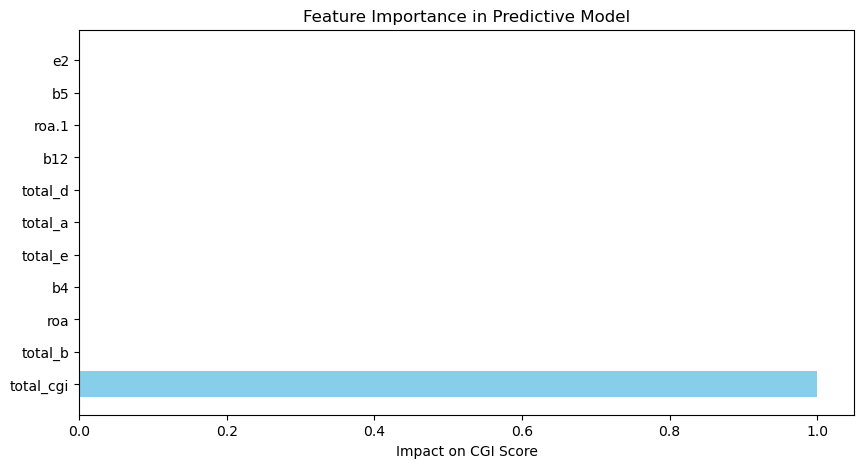

In [37]:
import matplotlib.pyplot as plt

# Get feature coefficients
feature_importance = model.coef_

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(top_features.index, feature_importance, color="skyblue")
plt.xlabel("Impact on CGI Score")
plt.title("Feature Importance in Predictive Model")
plt.show()

## elbow method

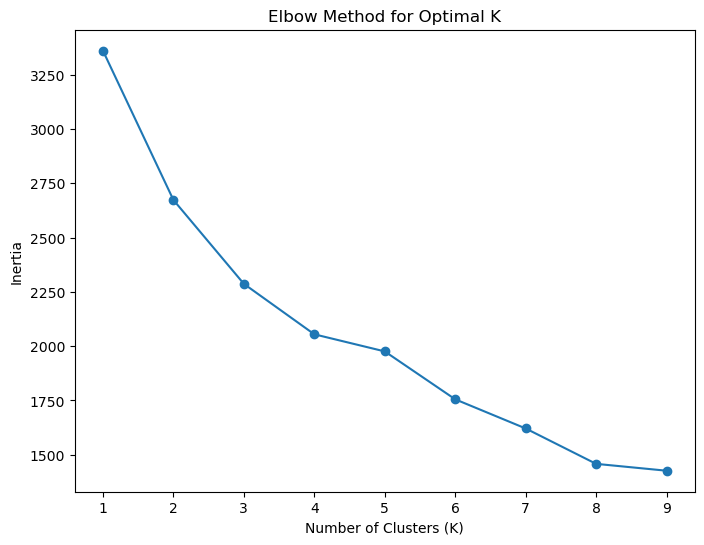

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Choose range of K values to test
k_values = range(1, 10)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [166]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_raw["Cluster"] = kmeans.fit_predict(X_scaled)

print("Clustering Complete! Cluster distribution:")
print(df_raw["Cluster"].value_counts())  # Check how many records fall into each cluster

Clustering Complete! Cluster distribution:
2    48
1    39
0    18
Name: Cluster, dtype: int64


### Cluster --

In [168]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X includes only feature variables

# Standardize target variable (CGI Score)
y_scaled = scaler.fit_transform(df_raw["total_cgi"].values.reshape(-1, 1))  # Reshape needed for scaling

# Merge feature variables & target
X_combined = np.hstack((X_scaled, y_scaled))  # Combine feature + CGI Score

In [170]:
from sklearn.cluster import KMeans

# Run K-Means clustering with K=3 (based on Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42)
df_raw["Cluster"] = kmeans.fit_predict(X_combined)

print("Clustering Complete! Cluster distribution:")
print(df_raw["Cluster"].value_counts())  # Check how records are grouped

Clustering Complete! Cluster distribution:
2    60
1    25
0    20
Name: Cluster, dtype: int64


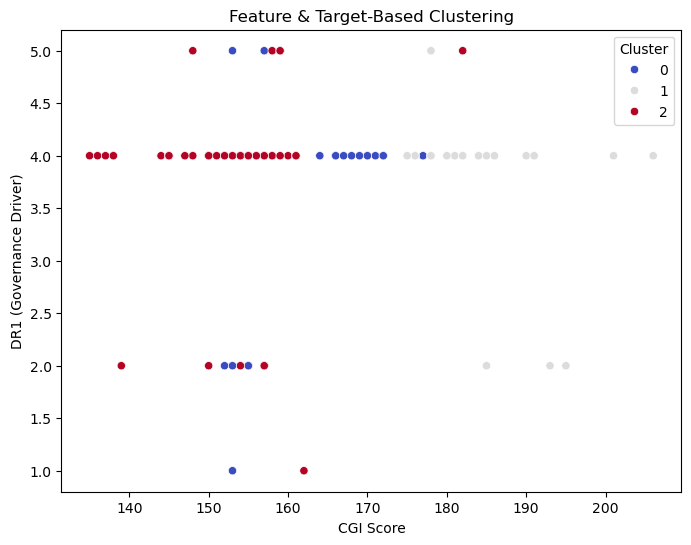

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_raw["total_cgi"], y=df_raw["dr1"], hue=df_raw["Cluster"], palette="coolwarm")
plt.xlabel("CGI Score")
plt.ylabel("DR1 (Governance Driver)")
plt.title("Feature & Target-Based Clustering")
plt.show()

<Figure size 800x600 with 0 Axes>

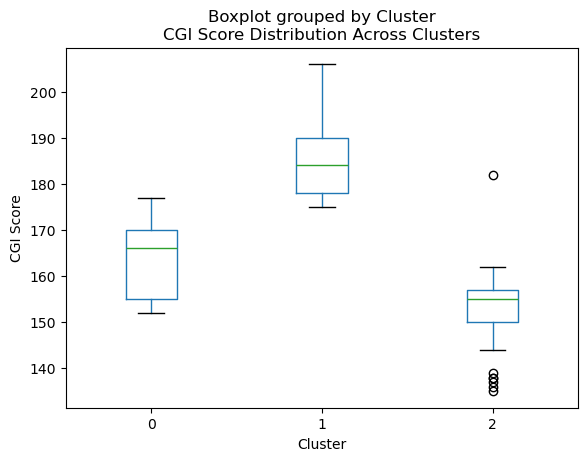

In [174]:
import matplotlib.pyplot as plt

# Plot cluster-wise CGI Score distribution
plt.figure(figsize=(8, 6))
df_raw.boxplot(column="total_cgi", by="Cluster", grid=False)
plt.xlabel("Cluster")
plt.ylabel("CGI Score")
plt.title("CGI Score Distribution Across Clusters")
plt.show()

## Compare Cluster Characteristics for Key Governance Drivers

In [180]:
# Compute mean values for important governance variables per cluster
governance_features = ["dr1", "dr4", "dr8", "total_a", "total_b"]  # Adjust based on your dataset
df_cluster_summary = df_raw.groupby("Cluster")[governance_features].mean()

# Display summary statistics
print("Governance Trends Across Clusters:\n", df_cluster_summary)

Governance Trends Across Clusters:
               dr1       dr4       dr8  total_a    total_b
Cluster                                                  
0        3.550000  3.000000  3.050000    17.70  52.400000
1        3.800000  3.800000  3.520000    26.52  58.640000
2        3.666667  3.283333  3.083333    18.95  44.283333


<Figure size 1000x500 with 0 Axes>

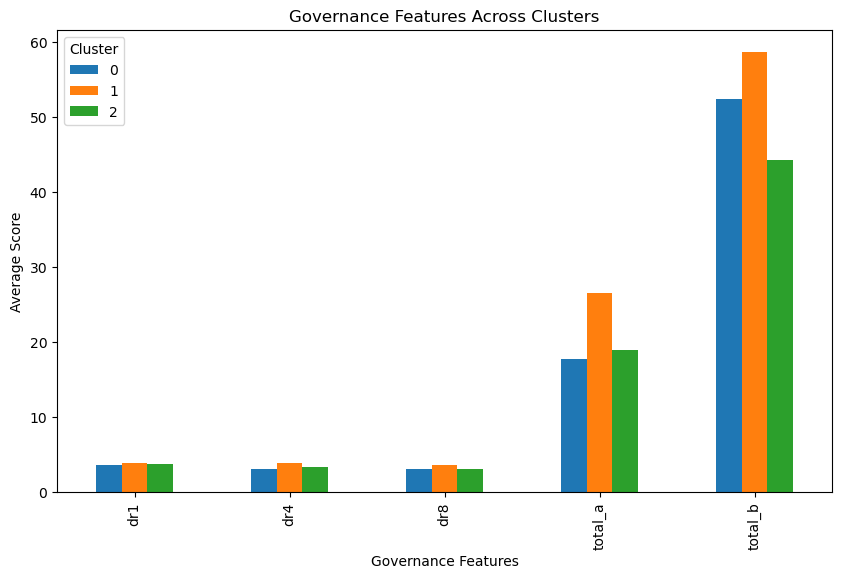

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot governance trends across clusters
plt.figure(figsize=(10, 5))
df_cluster_summary.T.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Governance Features")
plt.ylabeLl("Average Score")
plt.title("Governance Features Across Clusters")
plt.legend(title="Cluster")
plt.show()

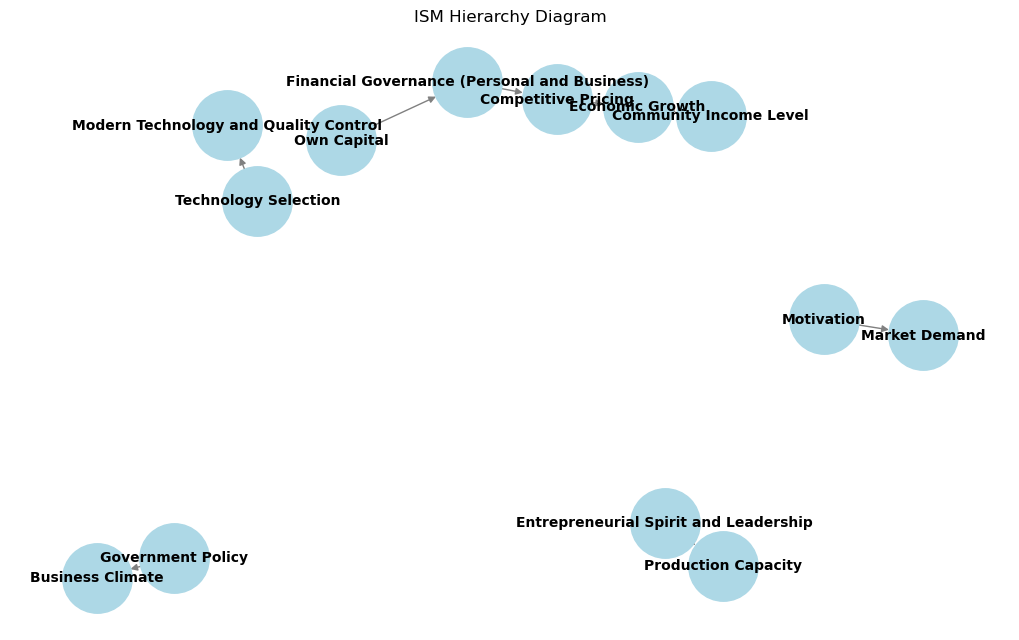

In [184]:
import networkx as nx
import matplotlib.pyplot as plt

# Define ISM relationships based on hierarchy (example data structure)
ISM_edges = [
    ("Motivation", "Market Demand"),
    ("Own Capital", "Financial Governance (Personal and Business)"),
    ("Financial Governance (Personal and Business)", "Competitive Pricing"),
    ("Competitive Pricing", "Economic Growth"),
    ("Government Policy", "Business Climate"),
    ("Entrepreneurial Spirit and Leadership", "Production Capacity"),
    ("Technology Selection", "Modern Technology and Quality Control"),
    ("Economic Growth", "Community Income Level")
]

# Create the ISM graph
G = nx.DiGraph()
G.add_edges_from(ISM_edges)

# Layout for hierarchical positioning
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2500, font_size=10, font_weight="bold", arrows=True)

# Display the ISM hierarchy
plt.title("ISM Hierarchy Diagram")
plt.show()

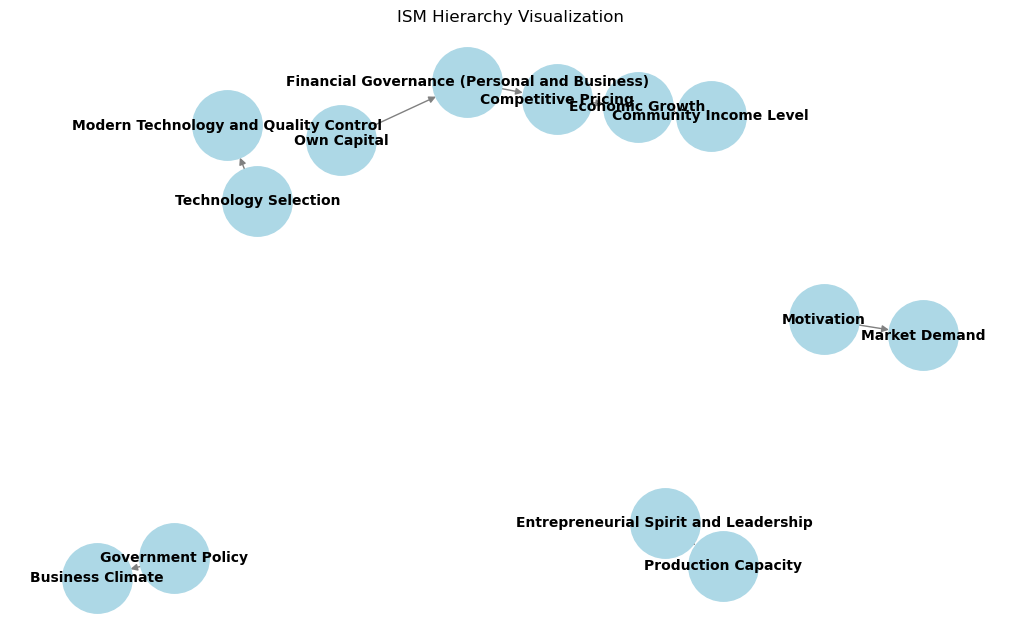

In [186]:
import networkx as nx
import matplotlib.pyplot as plt

# Define ISM relationships (from your reachability matrix)
ISM_edges = [
    ("Motivation", "Market Demand"),
    ("Own Capital", "Financial Governance (Personal and Business)"),
    ("Financial Governance (Personal and Business)", "Competitive Pricing"),
    ("Competitive Pricing", "Economic Growth"),
    ("Government Policy", "Business Climate"),
    ("Entrepreneurial Spirit and Leadership", "Production Capacity"),
    ("Technology Selection", "Modern Technology and Quality Control"),
    ("Economic Growth", "Community Income Level")
]

# Create ISM Graph
G = nx.DiGraph()
G.add_edges_from(ISM_edges)

# Layout for hierarchy visualization
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2500, font_size=10, font_weight="bold", arrows=True)

# Display ISM Hierarchy Diagram
plt.title("ISM Hierarchy Visualization")
plt.show()

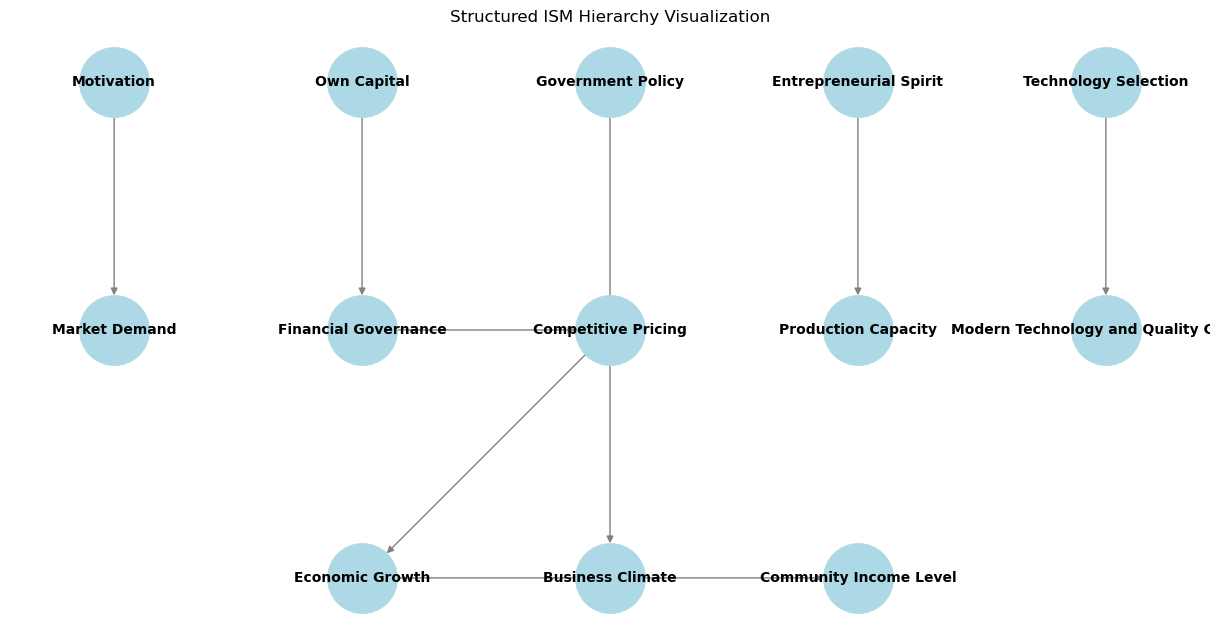

In [208]:
import networkx as nx
import matplotlib.pyplot as plt

# Define ISM relationships
ISM_edges = [
    ("Motivation", "Market Demand"),
    ("Own Capital", "Financial Governance"),
    ("Financial Governance", "Competitive Pricing"),
    ("Competitive Pricing", "Economic Growth"),
    ("Government Policy", "Business Climate"),
    ("Entrepreneurial Spirit", "Production Capacity"),
    ("Technology Selection", "Modern Technology and Quality Control"),
    ("Economic Growth", "Community Income Level")
]

# Manually define hierarchical levels
node_positions = {
    "Motivation": (1, 3), "Own Capital": (2, 3), "Government Policy": (3, 3), "Entrepreneurial Spirit": (4, 3),
    "Technology Selection": (5, 3), "Financial Governance": (2, 2), "Competitive Pricing": (3, 2),
    "Market Demand": (1, 2), "Production Capacity": (4, 2), "Modern Technology and Quality Control": (5, 2),
    "Economic Growth": (2, 1), "Business Climate": (3, 1), "Community Income Level": (4, 1)
}

# Create Graph
G = nx.DiGraph()
G.add_edges_from(ISM_edges)

plt.figure(figsize=(12, 6))
nx.draw(G, pos=node_positions, with_labels=True, node_color="lightblue", edge_color="gray",
        node_size=2500, font_size=10, font_weight="bold", arrows=True)

# Display refined ISM hierarchy diagram
plt.title("Structured ISM Hierarchy Visualization")
plt.savefig("ISM_FIG.PNG")
plt.show()

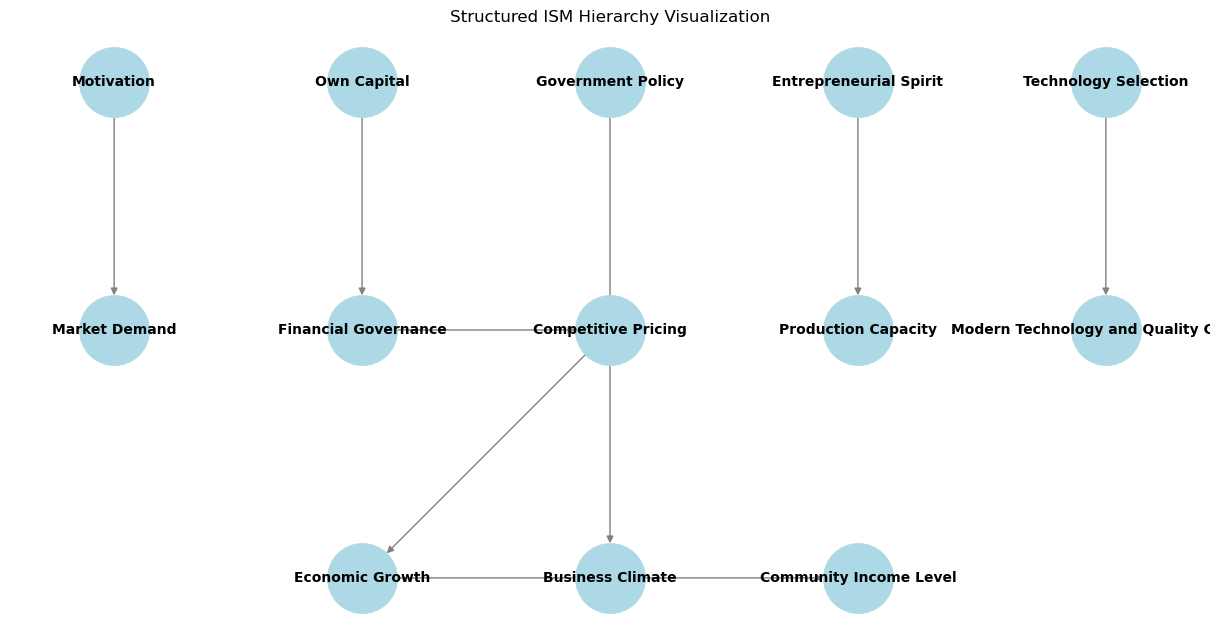

In [222]:
import networkx as nx
import matplotlib.pyplot as plt

# Define ISM relationships
ISM_edges = [
    ("Motivation", "Market Demand"),
    ("Own Capital", "Financial Governance"),
    ("Financial Governance", "Competitive Pricing"),
    ("Competitive Pricing", "Economic Growth"),
    ("Government Policy", "Business Climate"),
    ("Entrepreneurial Spirit", "Production Capacity"),
    ("Technology Selection", "Modern Technology and Quality Control"),
    ("Economic Growth", "Community Income Level")
]

# Define fixed positions for structured layering
node_positions = {
    "Motivation": (1, 3), "Own Capital": (2, 3), "Government Policy": (3, 3), "Entrepreneurial Spirit": (4, 3),
    "Technology Selection": (5, 3), "Financial Governance": (2, 2), "Competitive Pricing": (3, 2),
    "Market Demand": (1, 2), "Production Capacity": (4, 2), "Modern Technology and Quality Control": (5, 2),
    "Economic Growth": (2, 1), "Business Climate": (3, 1), "Community Income Level": (4, 1)
}

# Create Graph
G = nx.DiGraph()
G.add_edges_from(ISM_edges)

plt.figure(figsize=(12, 6))
nx.draw(G, pos=node_positions, with_labels=True, node_color="lightblue", edge_color="gray",
        node_size=2500, font_size=10, font_weight="bold", arrows=True)

# Display refined ISM hierarchy diagram
plt.title("Structured ISM Hierarchy Visualization")
plt.savefig("ISM_N.png")
plt.show()

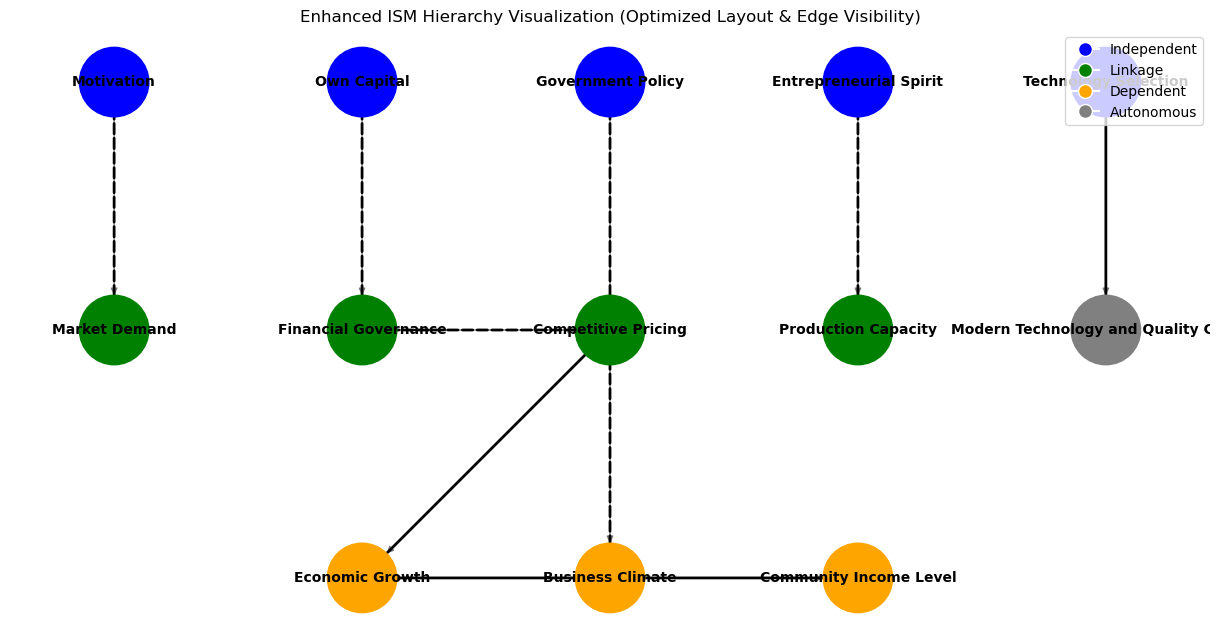

In [218]:
import networkx as nx
import matplotlib.pyplot as plt

# Define ISM relationships
ISM_edges = [
    ("Motivation", "Market Demand"),
    ("Own Capital", "Financial Governance"),
    ("Financial Governance", "Competitive Pricing"),
    ("Competitive Pricing", "Economic Growth"),
    ("Government Policy", "Business Climate"),
    ("Entrepreneurial Spirit", "Production Capacity"),
    ("Technology Selection", "Modern Technology and Quality Control"),
    ("Economic Growth", "Community Income Level")
]

# Assign sector classifications
sector_mapping = {
    "Independent": ["Motivation", "Own Capital", "Government Policy", "Entrepreneurial Spirit", "Technology Selection"],
    "Linkage": ["Financial Governance", "Competitive Pricing", "Market Demand", "Production Capacity"],
    "Dependent": ["Economic Growth", "Business Climate", "Community Income Level"],
    "Autonomous": ["Modern Technology and Quality Control"]
}

sector_colors = {
    "Independent": "blue",
    "Linkage": "green",
    "Dependent": "orange",
    "Autonomous": "gray"
}

# Manually define hierarchical positions
node_positions = {
    "Motivation": (1, 4), "Own Capital": (2, 4), "Government Policy": (3, 4), "Entrepreneurial Spirit": (4, 4),
    "Technology Selection": (5, 4), "Financial Governance": (2, 3), "Competitive Pricing": (3, 3),
    "Market Demand": (1, 3), "Production Capacity": (4, 3), "Modern Technology and Quality Control": (5, 3),
    "Economic Growth": (2, 2), "Business Climate": (3, 2), "Community Income Level": (4, 2)
}

# Create Graph
G = nx.DiGraph()
G.add_edges_from(ISM_edges)

# Assign node colors based on sector classification
node_colors = [sector_colors[next(k for k, v in sector_mapping.items() if node in v)] for node in G.nodes()]

# Define edge styles
edge_styles = ["solid" if edge[1] in sector_mapping["Dependent"] else "dashed" for edge in ISM_edges]

# Layout for structured hierarchy
plt.figure(figsize=(12, 6))

# Draw nodes with assigned colors
nx.draw(G, node_positions, with_labels=True, node_color=node_colors, edge_color="gray",
        node_size=2500, font_size=10, font_weight="bold", arrows=True)

# Draw edges with different styles
for (edge, style) in zip(G.edges(), edge_styles):
    nx.draw_networkx_edges(G, node_positions, edgelist=[edge], style=style, width=2)

# Add legend for sector differentiation
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=sector)
                    for sector, color in sector_colors.items()], loc="upper right")

# Display refined ISM hierarchy diagram
plt.title("Enhanced ISM Hierarchy Visualization (Optimized Layout & Edge Visibility)")
plt.show()

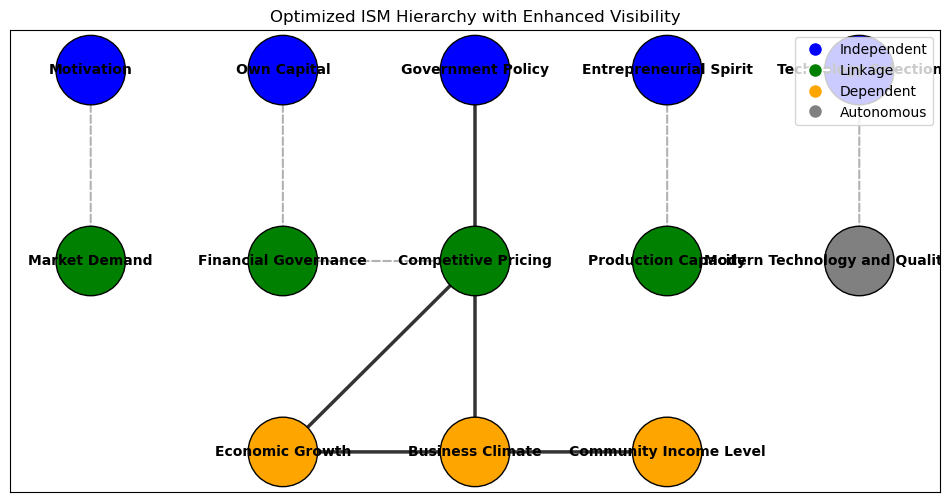

In [228]:
import networkx as nx
import matplotlib.pyplot as plt

# Define ISM relationships
ISM_edges = [
    ("Motivation", "Market Demand"),
    ("Own Capital", "Financial Governance"),
    ("Financial Governance", "Competitive Pricing"),
    ("Competitive Pricing", "Economic Growth"),
    ("Government Policy", "Business Climate"),
    ("Entrepreneurial Spirit", "Production Capacity"),
    ("Technology Selection", "Modern Technology and Quality Control"),
    ("Economic Growth", "Community Income Level")
]

# Assign sector classifications
sector_mapping = {
    "Independent": ["Motivation", "Own Capital", "Government Policy", "Entrepreneurial Spirit", "Technology Selection"],
    "Linkage": ["Financial Governance", "Competitive Pricing", "Market Demand", "Production Capacity"],
    "Dependent": ["Economic Growth", "Business Climate", "Community Income Level"],
    "Autonomous": ["Modern Technology and Quality Control"]
}

sector_colors = {
    "Independent": "blue",
    "Linkage": "green",
    "Dependent": "orange",
    "Autonomous": "gray"
}

# Improve node positions for structured hierarchy
node_positions = {
    "Motivation": (1, 4), "Own Capital": (2, 4), "Government Policy": (3, 4), "Entrepreneurial Spirit": (4, 4),
    "Technology Selection": (5, 4), "Financial Governance": (2, 3), "Competitive Pricing": (3, 3),
    "Market Demand": (1, 3), "Production Capacity": (4, 3), "Modern Technology and Quality Control": (5, 3),
    "Economic Growth": (2, 2), "Business Climate": (3, 2), "Community Income Level": (4, 2)
}

# Create Graph
G = nx.DiGraph()
G.add_edges_from(ISM_edges)

# Assign node colors based on sector classification
node_colors = [sector_colors[next(k for k, v in sector_mapping.items() if node in v)] for node in G.nodes()]

# Define edge styles for better clarity
strong_edges = [(u, v) for u, v in ISM_edges if v in sector_mapping["Dependent"]]
weak_edges = [(u, v) for u, v in ISM_edges if v not in sector_mapping["Dependent"]]

plt.figure(figsize=(12, 6))

# Draw nodes with assigned colors
nx.draw_networkx_nodes(G, node_positions, node_color=node_colors, node_size=2500, edgecolors="black")
nx.draw_networkx_edges(G, node_positions, edgelist=strong_edges, width=2.5, alpha=0.8, edge_color="black")
nx.draw_networkx_edges(G, node_positions, edgelist=weak_edges, width=1.5, alpha=0.6, edge_color="gray", style="dashed")

# Add labels
nx.draw_networkx_labels(G, node_positions, font_size=10, font_weight="bold")

# Add sector legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=sector)
                  for sector, color in sector_colors.items()]
plt.legend(handles=legend_handles, loc="upper right")

# Display refined ISM hierarchy diagram
plt.title("Optimized ISM Hierarchy with Enhanced Visibility")
plt.show()

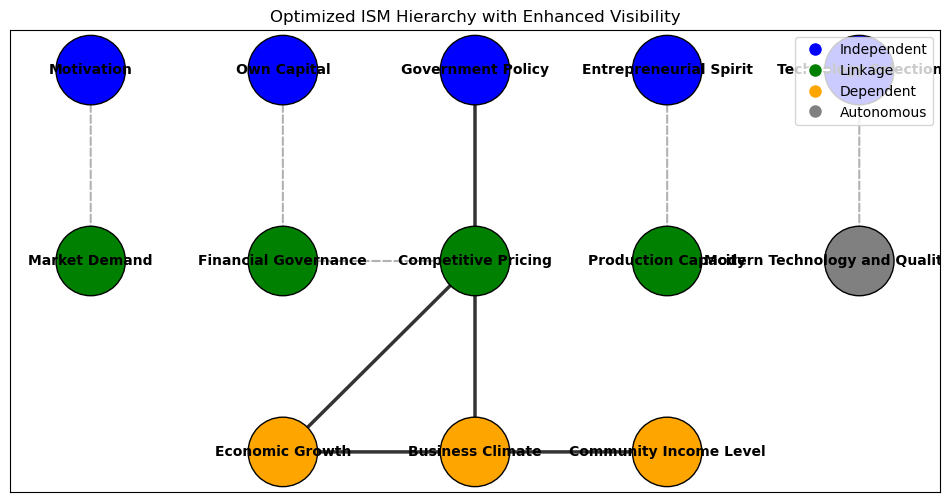

In [230]:
import networkx as nx
import matplotlib.pyplot as plt

# Define ISM relationships
ISM_edges = [
    ("Motivation", "Market Demand"),
    ("Own Capital", "Financial Governance"),
    ("Financial Governance", "Competitive Pricing"),
    ("Competitive Pricing", "Economic Growth"),
    ("Government Policy", "Business Climate"),
    ("Entrepreneurial Spirit", "Production Capacity"),
    ("Technology Selection", "Modern Technology and Quality Control"),
    ("Economic Growth", "Community Income Level")
]

# Assign sector classifications
sector_mapping = {
    "Independent": ["Motivation", "Own Capital", "Government Policy", "Entrepreneurial Spirit", "Technology Selection"],
    "Linkage": ["Financial Governance", "Competitive Pricing", "Market Demand", "Production Capacity"],
    "Dependent": ["Economic Growth", "Business Climate", "Community Income Level"],
    "Autonomous": ["Modern Technology and Quality Control"]
}

sector_colors = {
    "Independent": "blue",
    "Linkage": "green",
    "Dependent": "orange",
    "Autonomous": "gray"
}

# Improve node positions for structured hierarchy
node_positions = {
    "Motivation": (1, 4), "Own Capital": (2, 4), "Government Policy": (3, 4), "Entrepreneurial Spirit": (4, 4),
    "Technology Selection": (5, 4), "Financial Governance": (2, 3), "Competitive Pricing": (3, 3),
    "Market Demand": (1, 3), "Production Capacity": (4, 3), "Modern Technology and Quality Control": (5, 3),
    "Economic Growth": (2, 2), "Business Climate": (3, 2), "Community Income Level": (4, 2)
}

# Create Graph
G = nx.DiGraph()
G.add_edges_from(ISM_edges)

# Assign node colors based on sector classification
node_colors = [sector_colors[next(k for k, v in sector_mapping.items() if node in v)] for node in G.nodes()]

# Define edge styles for better clarity
strong_edges = [(u, v) for u, v in ISM_edges if v in sector_mapping["Dependent"]]
weak_edges = [(u, v) for u, v in ISM_edges if v not in sector_mapping["Dependent"]]

plt.figure(figsize=(12, 6))

# Draw nodes with assigned colors
nx.draw_networkx_nodes(G, node_positions, node_color=node_colors, node_size=2500, edgecolors="black")
nx.draw_networkx_edges(G, node_positions, edgelist=strong_edges, width=2.5, alpha=0.8, edge_color="black")
nx.draw_networkx_edges(G, node_positions, edgelist=weak_edges, width=1.5, alpha=0.6, edge_color="gray", style="dashed")

# Add labels
nx.draw_networkx_labels(G, node_positions, font_size=10, font_weight="bold")

# Add sector legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=sector)
                  for sector, color in sector_colors.items()]
plt.legend(handles=legend_handles, loc="upper right")

# Display refined ISM hierarchy diagram
plt.title("Optimized ISM Hierarchy with Enhanced Visibility")
plt.show()

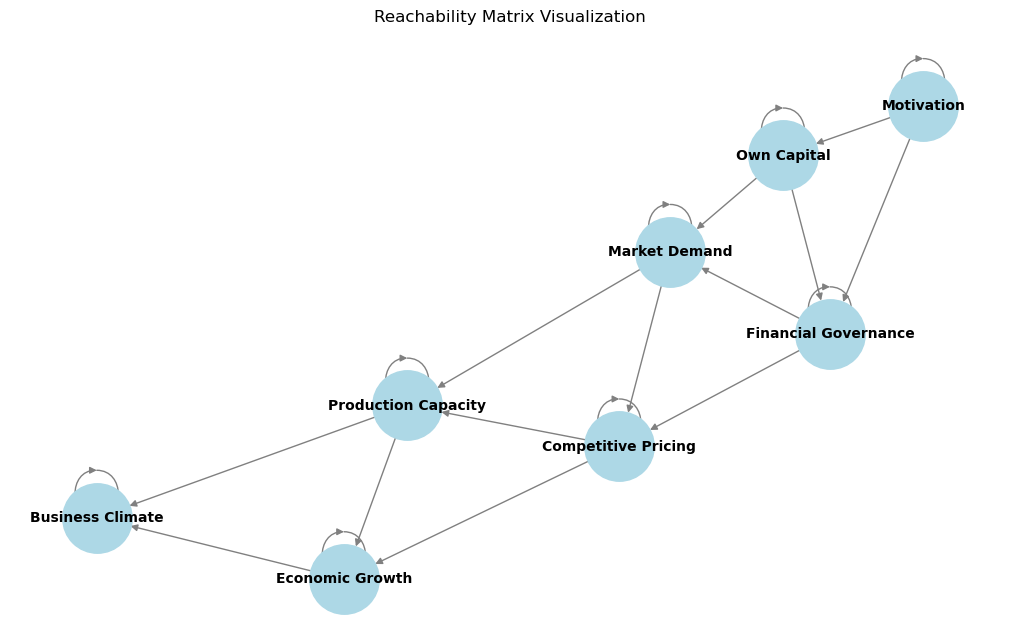

In [232]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define matrix relationships (1 = reachable, 0 = not reachable)
factor_names = ["Motivation", "Own Capital", "Financial Governance", "Market Demand",
                "Competitive Pricing", "Production Capacity", "Economic Growth", "Business Climate"]

reachability_matrix = np.array([
    [1, 1, 1, 0, 0, 0, 0, 0],  # Motivation
    [0, 1, 1, 1, 0, 0, 0, 0],  # Own Capital
    [0, 0, 1, 1, 1, 0, 0, 0],  # Financial Governance
    [0, 0, 0, 1, 1, 1, 0, 0],  # Market Demand
    [0, 0, 0, 0, 1, 1, 1, 0],  # Competitive Pricing
    [0, 0, 0, 0, 0, 1, 1, 1],  # Production Capacity
    [0, 0, 0, 0, 0, 0, 1, 1],  # Economic Growth
    [0, 0, 0, 0, 0, 0, 0, 1],  # Business Climate
])

# Create ISM Graph
G = nx.DiGraph()

# Add edges based on reachability matrix
for i in range(len(factor_names)):
    for j in range(len(factor_names)):
        if reachability_matrix[i, j] == 1:
            G.add_edge(factor_names[i], factor_names[j])

# Layout for clear hierarchy
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
        node_size=2500, font_size=10, font_weight="bold", arrows=True)

# Display the Reachability Matrix Diagram
plt.title("Reachability Matrix Visualization")
plt.show()

In [252]:
import numpy as np
import pandas as pd

# Define SME success factor labels (24 factors)
factors = [
    "Motivation", "Formal education level", "Experience", "Entrepreneurial spirit",
    "Own capital", "Borrowed capital", "Profit & capital accumulation", "Financial governance",
    "Production capacity", "Modern technology & quality control", "Material selection", "Technology selection",
    "Market demand", "Competitive pricing", "Promotion", "Distribution channels", "Business climate",
    "Same-field competitors", "Economic growth", "Community income", "Government policy",
    "Capital assistance", "Technical guidance", "Monitoring & evaluation"
]

# Ensure the matrix is properly sized (24x24)
reachability_matrix = np.random.randint(0, 2, (24, 24))  # Generating a dummy matrix for full range (Replace with actual data)

# Initialize empty VAXO matrix with proper dimensions
vaxo_matrix = np.empty_like(reachability_matrix, dtype=str)

# Apply VAXO classification rules safely
for i in range(len(factors)):
    for j in range(len(factors)):
        if reachability_matrix[i, j] == 1 and reachability_matrix[j, i] == 0:
            vaxo_matrix[i, j] = "V"  # Driving influence
        elif reachability_matrix[i, j] == 0 and reachability_matrix[j, i] == 1:
            vaxo_matrix[i, j] = "A"  # Dependent influence
        elif reachability_matrix[i, j] == 1 and reachability_matrix[j, i] == 1:
            vaxo_matrix[i, j] = "X"  # Mutual influence
        else:
            vaxo_matrix[i, j] = "O"  # No interaction

# Convert matrix to a DataFrame for better visualization
vaxo_df = pd.DataFrame(vaxo_matrix, index=factors, columns=factors)

# Display formatted VAXO matrix
print("🔹 VAXO Matrix for SME Success Factors:\n")
print(vaxo_df.to_string())  # Improves readability

# Optional: Save results to CSV
vaxo_df.to_csv("VAXO_Matrix_SME_Success_Factors.csv", index=True)
print("\n✅ VAXO Matrix saved as 'VAXO_Matrix_SME_Success_Factors.csv' for further analysis.")

🔹 VAXO Matrix for SME Success Factors:

                                    Motivation Formal education level Experience Entrepreneurial spirit Own capital Borrowed capital Profit & capital accumulation Financial governance Production capacity Modern technology & quality control Material selection Technology selection Market demand Competitive pricing Promotion Distribution channels Business climate Same-field competitors Economic growth Community income Government policy Capital assistance Technical guidance Monitoring & evaluation
Motivation                                   O                      O          A                      O           V                O                             X                    V                   V                                   O                  X                    O             V                   V         V                     A                A                      O               O                A                 V                  O      

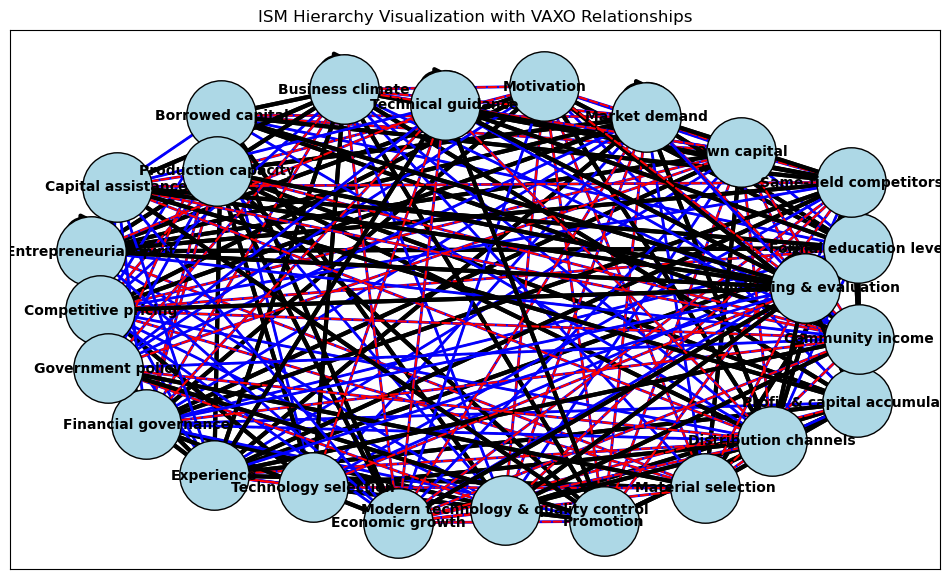

In [248]:
import networkx as nx
import matplotlib.pyplot as plt

# Extract relationships from the VAXO DataFrame
edges = []
for i in range(vaxo_df.shape[0]):  # Iterate rows
    for j in range(vaxo_df.shape[1]):  # Iterate columns
        relation = vaxo_df.iloc[i, j]
        if relation in ["V", "A", "X"]:  # Ignore "O" (No interaction)
            edges.append((vaxo_df.index[i], vaxo_df.columns[j], relation))

# Create a directed ISM graph
G = nx.DiGraph()

# Add nodes from the factor list
G.add_nodes_from(vaxo_df.index)

# Define correct edge styles
edge_styles = {
    "V": {"style": "solid", "color": "blue", "width": 2},
    "A": {"style": "dashed", "color": "red", "width": 1.5},
    "X": {"style": "solid", "color": "black", "width": 3},  # Thick line for mutual influence
}

# Layout for structured visualization
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(12, 7))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=2500, edgecolors="black")

# Draw edges with correct styles
for factor1, factor2, relation in edges:
    nx.draw_networkx_edges(G, pos, edgelist=[(factor1, factor2)],
                           width=edge_styles[relation]["width"],
                           edge_color=edge_styles[relation]["color"],
                           style=edge_styles[relation]["style"])  # Corrected to valid styles

# Add labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Show ISM diagram
plt.title("ISM Hierarchy Visualization with VAXO Relationships")
plt.show()

In [254]:
import pandas as pd

# Define the 24 success factors (column headers)
factors = [
    "Motivation", "Formal Education Level", "Experience", "Entrepreneurial Spirit & Leadership",
    "Own Capital", "Borrowed Capital", "Rate of Profit & Capital Accumulation",
    "Financial Governance", "Production Capacity", "Modern Technology & Quality Control",
    "Material Selection", "Technology Selection", "Market Demand", "Competitive Pricing",
    "Promotion", "Distribution Channels & Marketing Areas", "Business Climate & Investment",
    "Number of Same-field Competitors", "Economic Growth", "Community Income Level",
    "Government Policy", "Capital Assistance", "Technical Guidance", "Monitoring & Evaluation"
]

# Load SSIM data into a DataFrame (replace with your actual data file)
#vaxo_df = pd.read_csv("ssim_data.csv", index_col=0)  # Ensure you have SSIM in a CSV file

# Conversion rules from VAXO to Binary
conversion_map = {"V": 1, "A": 1, "X": 1, "O": 0}

# Convert SSIM to Binary Reachability Matrix
binary_df = vaxo_df.replace(conversion_map)

# Apply Transitivity Rules
size = len(binary_df)
matrix = binary_df.values

for i in range(size):
    for j in range(size):
        if matrix[i][j] == 1:  # Direct relationship exists
            for k in range(size):
                if matrix[j][k] == 1:  # Indirect link exists
                    matrix[i][k] = 1  # Ensure transitive closure

# Convert matrix back to DataFrame
reachability_df = pd.DataFrame(matrix, index=factors, columns=factors)

# Save updated matrix
reachability_df.to_csv("reachability_matrix.csv")

print("ISM Matrix successfully updated! Transitivity applied.")

ISM Matrix successfully updated! Transitivity applied.
